In [73]:
# Tensorflow : le package de Deep Learning que nous allons utiliser
import tensorflow as tf

# Gestion des tableaux de données
import numpy as np

# Visualisation
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:
# Création des données avec lesquelles nous allons entraîner le modèle
true_function = lambda x: 0.2*x**3 + 0.8*x**2 + 0.3*x + 0.3 + 5*np.sin(x)

X = np.random.uniform(-10, 10, size=100).reshape(-1, 1)
y = true_function(X)
true_y = y.copy()
y[:90] += np.random.randn(90, 1)*5
y[:10] += np.random.randn(10, 1)*100

In [84]:
# Normaliser les données (surtout les inputs) aide beaucoup à l'apprentissage.
# Je vous conseille de le faire la plupart du temps.
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y);

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

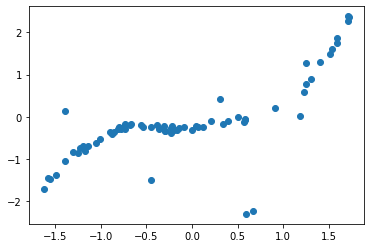

In [86]:
# Visualisation des données
plt.scatter(X_train, y_train)

Régularisateurs en DL :
- Nombre de paramètres
    - Nombre de layers
    - Nombre de neurones par layer
- Régularisation L1 & L2
- Dropout
- BatchNormalization
- Réduire le nombre d'epochs / EarlyStopping
- Augmenter la Batch Size
- ?? Learning Rate

In [105]:
def dense(units):
    return tf.keras.layers.Dense(units, activation='relu')

# Construction du modèle : Attention il overfit, régularisez-le !
model = tf.keras.models.Sequential([
    dense(256),
    dense(256),
    dense(256),
    tf.keras.layers.Dense(1, activation='linear'),
])

# "Compilation" du modèle: On indique quelle fonction de perte et quel optimisateur utiliser.
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="mse",
)

# Entrainement
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=100,
    epochs=1000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=0.01,
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
    ],
    verbose=True,
)

Epoch 1/1000
1/1 [==============================] - 0s 997us/step - loss: 0.9082
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7685
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6673
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5917
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5333
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4873
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4561
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4365
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4229
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4120
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4041
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4003
Epoch 13/1000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 33/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 34/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2667
Epoch 35/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 36/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2544
Epoch 37/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2489
Epoch 38/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 39/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2362
Epoch 40/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2306
Epoch 41/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2257
Epoch 42/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2208
Epoch 43/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2158
Epoch 44/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.1379
Epoch 96/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1369
Epoch 97/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1359
Epoch 98/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1350
Epoch 99/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1342
Epoch 100/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1333
Epoch 101/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1324
Epoch 102/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1316
Epoch 103/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1308
Epoch 104/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1300
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1293
Epoch 106/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1286
Epoch 107/1000
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 159/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1028
Epoch 160/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 161/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1021
Epoch 162/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1017
Epoch 163/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1013
Epoch 164/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 165/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1005
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1001
Epoch 167/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0997
Epoch 168/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 169/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0989
Epoch 170/1000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0751
Epoch 222/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 223/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 224/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 225/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0725
Epoch 226/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0727
Epoch 227/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 228/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 229/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 230/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 231/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 232/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0694
Epoch 233/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0493
Epoch 285/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 286/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 287/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0477
Epoch 288/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0479
Epoch 289/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 290/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 291/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0468
Epoch 292/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0473
Epoch 293/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 294/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0486
Epoch 295/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 296/1000
1/1 [======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 348/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0405
Epoch 349/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 350/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 351/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0403
Epoch 352/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 353/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0405
Epoch 354/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 355/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0406
Epoch 356/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 357/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 358/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 359/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 411/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0389
Epoch 412/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0389
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 414/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0388
Epoch 415/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 416/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 417/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 418/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 419/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0388
Epoch 420/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 421/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 422/1000
1/1 [=====================

1/1 [==============================] - 0s 4ms/step - loss: 0.0381
Epoch 474/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0381
Epoch 475/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 476/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0380
Epoch 477/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0381
Epoch 478/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 479/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0381
Epoch 480/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0381
Epoch 481/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0382
Epoch 482/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 483/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 484/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 485/1000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 537/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 538/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 539/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 540/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0373
Epoch 541/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0371
Epoch 542/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0369
Epoch 543/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 544/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0369
Epoch 545/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370
Epoch 546/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0370
Epoch 547/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 548/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 600/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0358
Epoch 601/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0357
Epoch 602/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 603/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0356
Epoch 604/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 605/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 606/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 607/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 608/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 609/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 611/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0347
Epoch 663/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0346
Epoch 664/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 665/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 666/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0346
Epoch 667/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0346
Epoch 668/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 669/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 670/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 671/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 672/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0345
Epoch 673/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0345
Epoch 674/1000
1/1 [=======================

KeyboardInterrupt: 

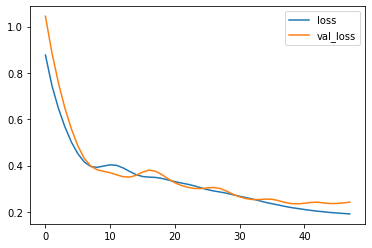

In [103]:
hist = history.history
plt.plot(np.arange(48), hist["loss"], label="loss")
plt.plot(np.arange(48), hist["val_loss"], label="val_loss")
plt.legend()

Regardons maintenant si le modèle a bien appris.

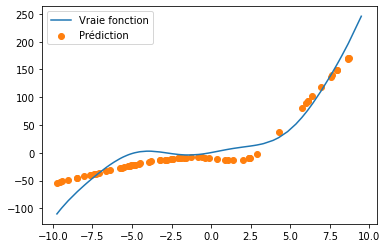

In [104]:
y_pred = model.predict(X_train)

X_unscaled = X_scaler.inverse_transform(X)
X_train_unscaled = X_scaler.inverse_transform(X_train)

plt.plot(np.sort(X_unscaled, 0), true_function(np.sort(X_unscaled, 0)), label="Vraie fonction")
#plt.scatter(X_unscaled, y_scaler.inverse_transform(y), label="Données", c="C0")
plt.scatter(X_train_unscaled, y_scaler.inverse_transform(y_pred), label="Prédiction", c="C1")
plt.legend()

Vérifions à présent que les coefficients appris par le modèle correspondent bien aux coefficients que nous avions utilisés pour générer les données : 0.2 et 0.3.

In [74]:
model.layers[0].variables

[
  <tf.Variable 'sequential_20/dense_20/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.19714294]], dtype=float32)>,
  <tf.Variable 'sequential_20/dense_20/bias:0' shape=(1,) dtype=float32, numpy=array([0.3033344], dtype=float32)>,
]